In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [2]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


<AxesSubplot:>

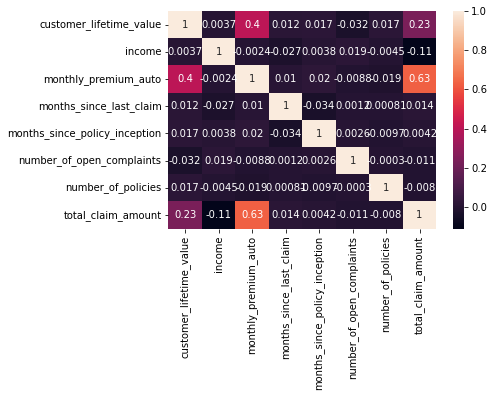

In [3]:
numbers = ["int64", ]
numericals = df.select_dtypes(include=numbers)
sns.heatmap(numericals.corr(), annot=True)

In [4]:
categories = ["object"]
categoricals = df.select_dtypes(include=categories)
categoricals.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [5]:
label_features = ["coverage", "education", "vehicle_size"]
label_cat = categoricals[label_features]

In [6]:
label_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   coverage      10689 non-null  object
 1   education     10689 non-null  object
 2   vehicle_size  10689 non-null  object
dtypes: object(3)
memory usage: 250.6+ KB


In [8]:
categoricals.drop(label_features, axis=1, inplace = True)
categoricals.head()

,region,response,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,central,no,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car
1,west region,no,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car
2,east,no,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv
3,north west,yes,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car
4,north west,no,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car


In [21]:

encoder = OneHotEncoder()
hotcateg = encoder.fit_transform(categoricals).toarray()
hotcateg.shape

(10689, 106)

In [31]:
labencoder = LabelEncoder()
hotcateg_cov = labencoder.fit_transform(label_cat["coverage"])
hotcateg_edu = labencoder.fit_transform(label_cat["education"])
hotcateg_vs = labencoder.fit_transform(label_cat["vehicle_size"])
uni_df= np.stack([hotcateg_cov, hotcateg_edu, hotcateg_vs])
uni_df

array([[0, 0, 0, ..., 1, 2, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [16]:
cat_dumms = pd.get_dummies(categoricals)
cat_dumms

,region_central,region_east,region_north west,region_west region,response_no,response_yes,effective_to_date_1/1/11,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,...,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10686,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
10687,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

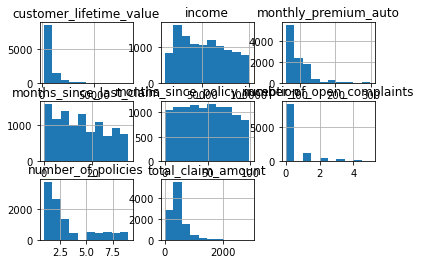

In [17]:
numericals.hist()

In [18]:
pwr = PowerTransformer()
ltv = numericals["customer_lifetime_value"]
ltv_array = ltv.to_numpy()
ltv_array= np.reshape(ltv_array,(-1, 1))
ltv = pwr.fit_transform(ltv_array)
print(ltv)

[[-0.33614341]
 [-1.86720472]
 [ 1.2922699 ]
 ...
 [ 1.79973101]
 [ 1.0217405 ]
 [ 0.24359374]]


In [19]:
stscl = StandardScaler()
mpa = numericals["monthly_premium_auto"]
mpa_array = mpa.to_numpy()
mpa_array= np.reshape(ltv_array,(-1, 1))
mpa = pwr.fit_transform(mpa_array)
print(mpa)

[[-0.33614341]
 [-1.86720472]
 [ 1.2922699 ]
 ...
 [ 1.79973101]
 [ 1.0217405 ]
 [ 0.24359374]]
